# Enerji İstatistik Notu 69 - Petrol Krizleri Artık Yok mu?

Barış Sanlı , barissanli2@gmail.com

github.com/barissanli/ein

In [2]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("../kureselenerjimodeli/merged_narrow.csv")

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [9]:
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('ggplot')


In [10]:
orjinal=df.copy()
liste=["primary_ej","primary_eintensity","pop", "elect_twh","oilcons_ej","gascons_ej","coalcons_ej","hydro_ej","renewables_ej"]
pc_list=["elect_twh","oilcons_ej","gascons_ej","coalcons_ej","hydro_ej","renewables_ej"]

In [11]:
dfw=df[df.Country=="Total World"]

In [12]:
dfw=dfw.pivot(index='Year', columns='Var', values='Value')

In [13]:
dfw["Elec_Ratio"]=(dfw.elect_twh/277.7)/dfw.primary_ej

Text(0, 0.5, 'Yüzde - %')

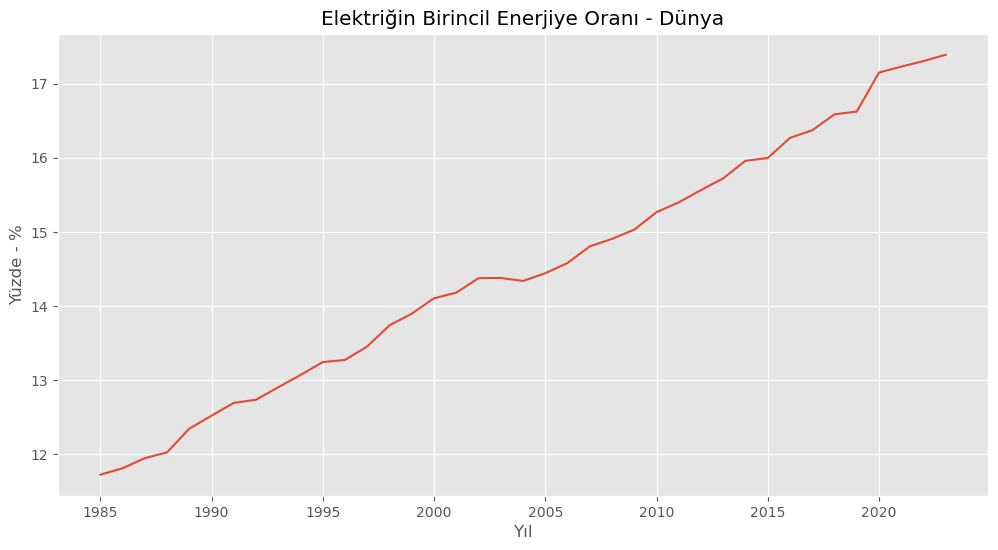

In [14]:
plot(dfw.Elec_Ratio*100)
title("Elektriğin Birincil Enerjiye Oranı - Dünya")
xlabel("Yıl")
ylabel("Yüzde - %")

In [15]:
dfw["Oil_Ratio"]=dfw.oilcons_ej/dfw.primary_ej
dfw["Gas_Ratio"]=dfw.gascons_ej/dfw.primary_ej
dfw["Coal_Ratio"]=dfw.coalcons_ej/dfw.primary_ej

Text(0.5, 1.0, 'Dünya Birincil Enerji Tüketiminde Petrol, Gaz ve Kömürün Payı')

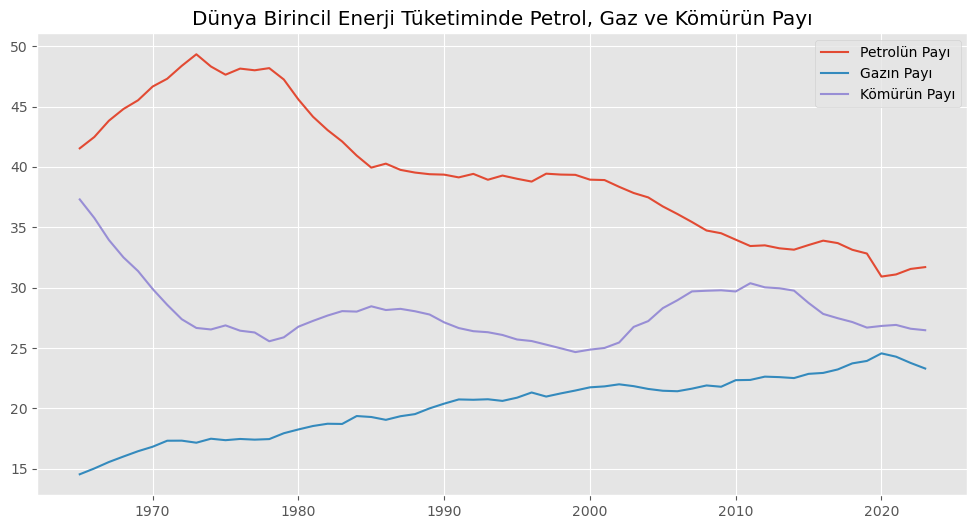

In [16]:
plot(dfw.Oil_Ratio*100,label="Petrolün Payı")
plot(dfw.Gas_Ratio*100,label="Gazın Payı")
plot(dfw.Coal_Ratio*100,label="Kömürün Payı")
legend()
title("Dünya Birincil Enerji Tüketiminde Petrol, Gaz ve Kömürün Payı")

Text(0, 0.5, '%  Percent')

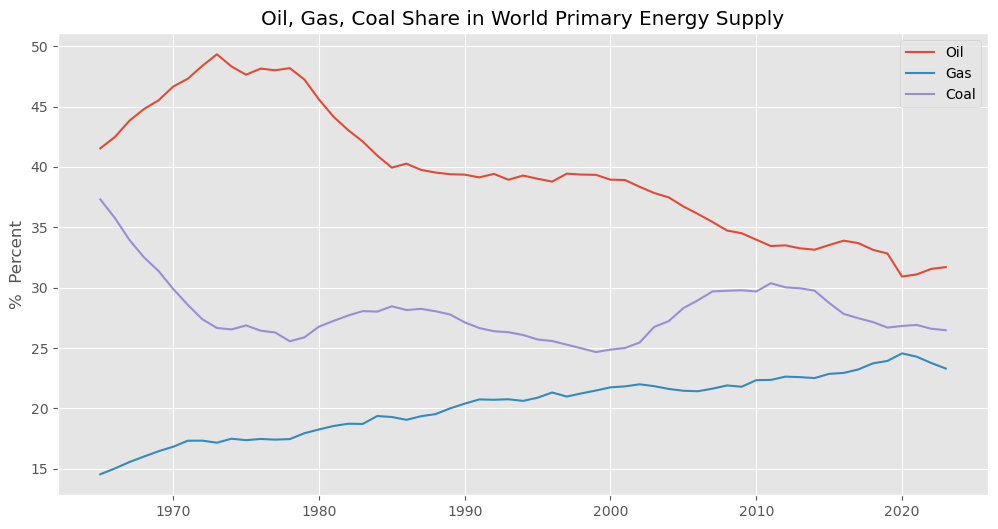

In [17]:
plot(dfw.Oil_Ratio*100,label="Oil")
plot(dfw.Gas_Ratio*100,label="Gas")
plot(dfw.Coal_Ratio*100,label="Coal")
legend()
title("Oil, Gas, Coal Share in World Primary Energy Supply")
ylabel("%  Percent")

In [18]:
#dfw.columns

In [19]:
#dfw["toplam"]=dfw.oilcons_ej+dfw.gascons_ej+dfw.coalcons_ej+dfw.nuclear_ej+dfw.hydro_ej+dfw.biogeo_ej+dfw.solar_ej+dfw.wind_ej+dfw.biofuels_cons_ej

In [20]:
#test
#dfw[["toplam","primary_ej"]]

In [21]:
dfw["elec_oilratio"]=dfw.electbyfuel_oil/dfw.elect_twh
dfw["elec_gasratio"]=dfw.electbyfuel_gas/dfw.elect_twh
dfw["elec_coalratio"]=dfw.electbyfuel_coal/dfw.elect_twh

Text(0, 0.5, '%  Yüzde')

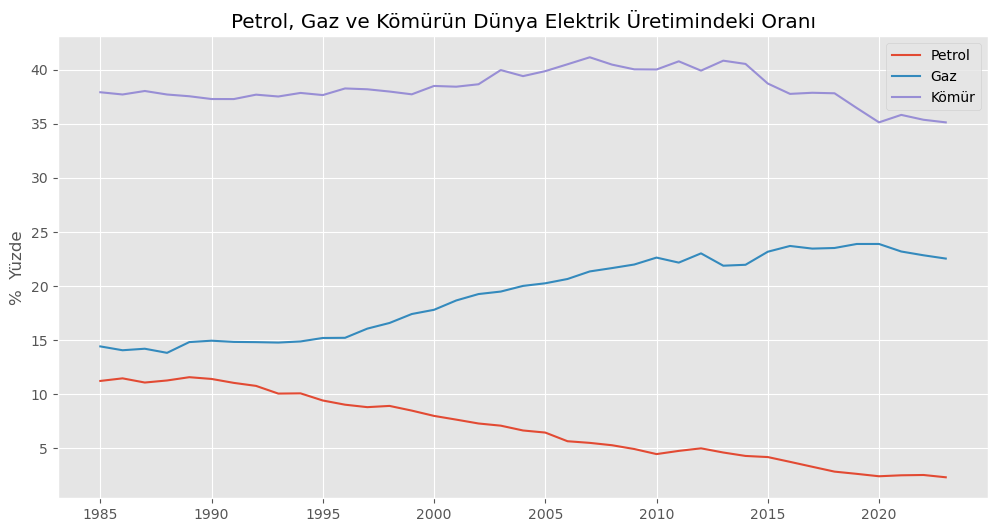

In [23]:
plot(dfw.elec_oilratio*100,label="Petrol")
plot(dfw.elec_gasratio*100,label="Gaz")
plot(dfw.elec_coalratio*100,label="Kömür")
legend()
title("Petrol, Gaz ve Kömürün Dünya Elektrik Üretimindeki Oranı")
ylabel("%  Yüzde")

Text(0, 0.5, '%  Percent')

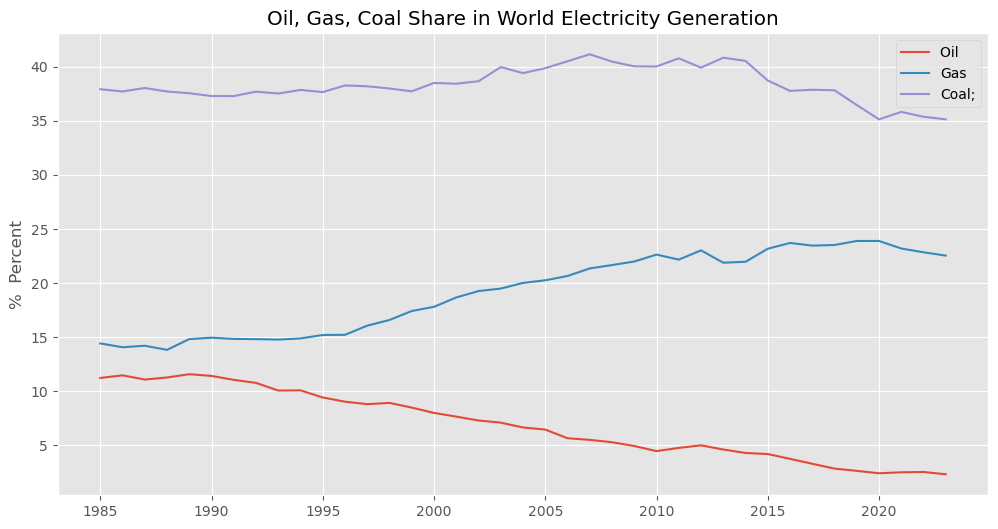

In [22]:
plot(dfw.elec_oilratio*100,label="Oil ")
plot(dfw.elec_gasratio*100,label="Gas")
plot(dfw.elec_coalratio*100,label="Coal;")
legend()
title("Oil, Gas, Coal Share in World Electricity Generation")
ylabel("%  Percent")

In [28]:
dfw["petrol_toplam"]=dfw.oilcons_ej+dfw.biofuels_cons_ej

Text(0, 0.5, '%  Yüzde')

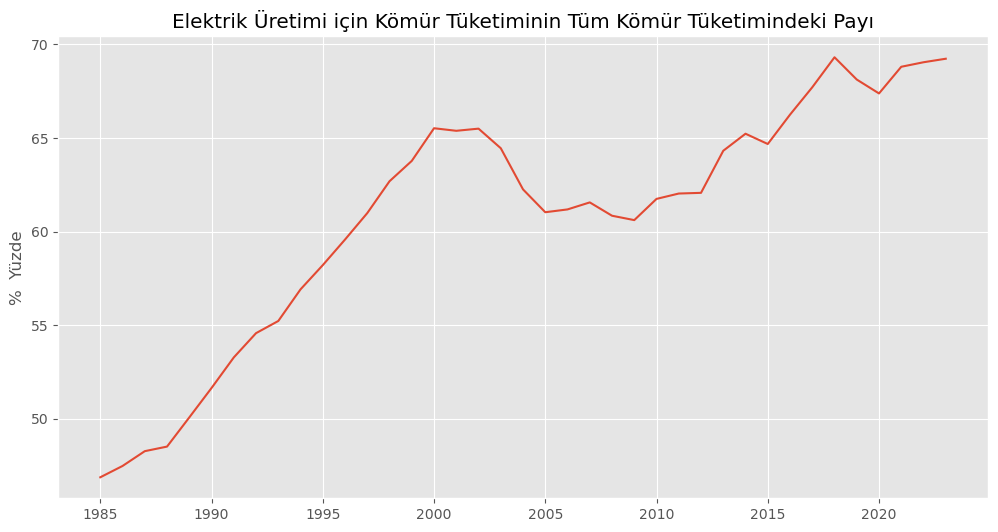

In [29]:
dfw["elektrikteki_komur"]=(dfw.electbyfuel_coal*3)/277.7
plot(100*dfw.elektrikteki_komur/dfw.coalcons_ej)
title("Elektrik Üretimi için Kömür Tüketiminin Tüm Kömür Tüketimindeki Payı")
ylabel("%  Yüzde")

Text(0, 0.5, '%  Percent')

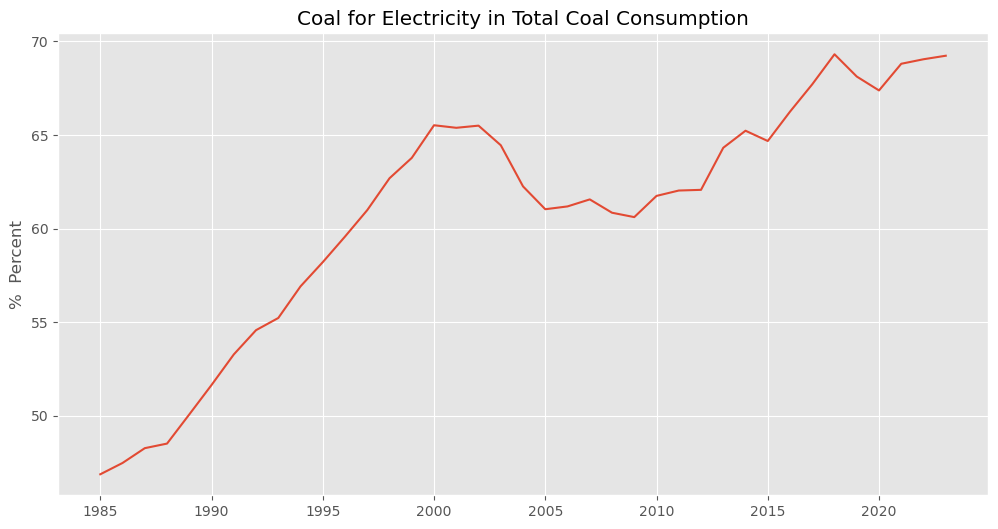

In [30]:
dfw["elektrikteki_komur"]=(dfw.electbyfuel_coal*3)/277.7
plot(100*dfw.elektrikteki_komur/dfw.coalcons_ej)
title("Coal for Electricity in Total Coal Consumption")
ylabel("%  Percent")

In [31]:
dfw["gas_toplam"]=dfw.gascons_ej+dfw.elektrikteki_komur+dfw.nuclear_ej+dfw.hydro_ej+dfw.biogeo_ej+dfw.solar_ej+dfw.wind_ej

In [32]:
dfw["diger_toplam"]=dfw.primary_ej-dfw.petrol_toplam-dfw.gas_toplam

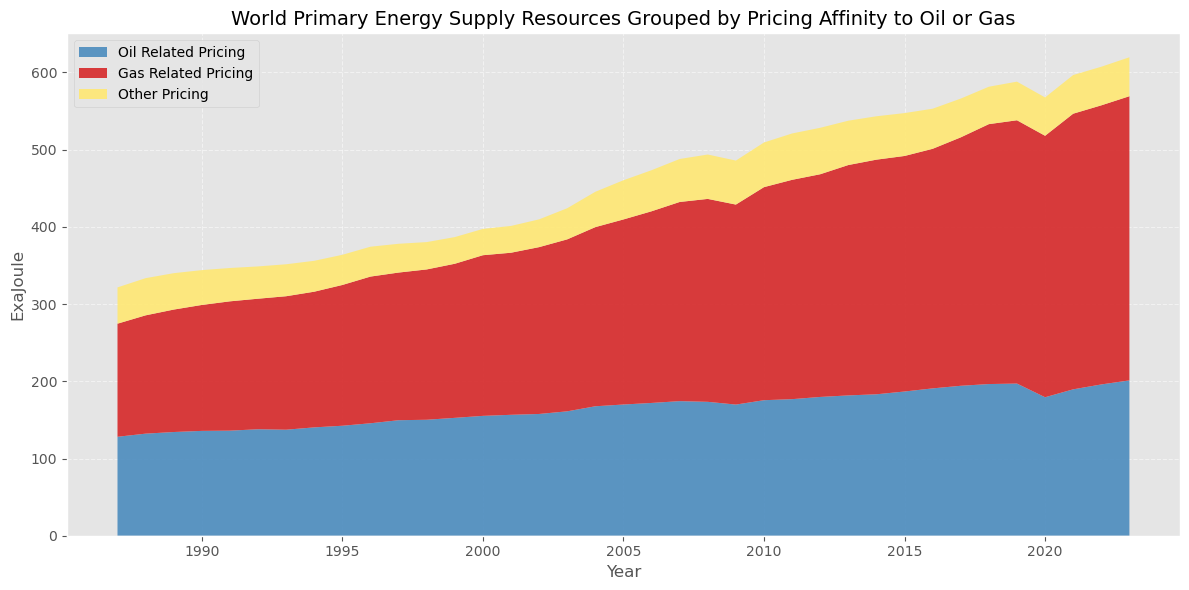

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is called df
#dfw['date'] = pd.to_datetime(dfw.index)  # Or replace with your actual date column
#dfw = dfw.sort_values('date')

colors = ['#4B8BBE', '#D62728', '#FFE873']  # Petrol (blue), Gas (red), Diğer (yellow)


# Prepare data for stacking
stack_data = dfw[['petrol_toplam', 'gas_toplam', 'diger_toplam']]
stack_data=stack_data[stack_data.index> 1986]

# Create a professional-looking stacked area plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.stackplot(stack_data.index, 
             stack_data.T,
             labels=['Oil Related Pricing', 'Gas Related Pricing', 'Other Pricing'],
                          alpha=0.9,
             colors=colors)

# Styling
ax.legend(loc='upper left')
ax.set_title('World Primary Energy Supply Resources Grouped by Pricing Affinity to Oil or Gas', fontsize=14)
ax.set_xlabel('Year')
ax.set_ylabel('ExaJoule')
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


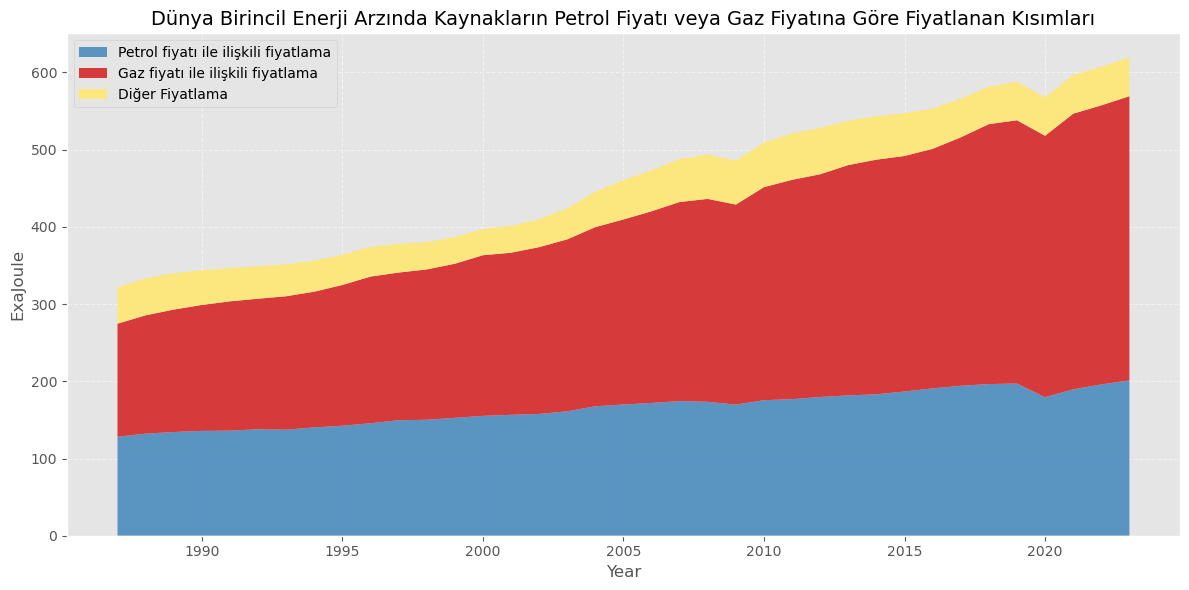

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.stackplot(stack_data.index, 
             stack_data.T,
             labels=['Petrol fiyatı ile ilişkili fiyatlama', 'Gaz fiyatı ile ilişkili fiyatlama', 'Diğer Fiyatlama'],
                          alpha=0.9,
             colors=colors)

# Styling
ax.legend(loc='upper left')
ax.set_title('Dünya Birincil Enerji Arzında Kaynakların Petrol Fiyatı veya Gaz Fiyatına Göre Fiyatlanan Kısımları', fontsize=14)
ax.set_xlabel('Year')
ax.set_ylabel('ExaJoule')
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

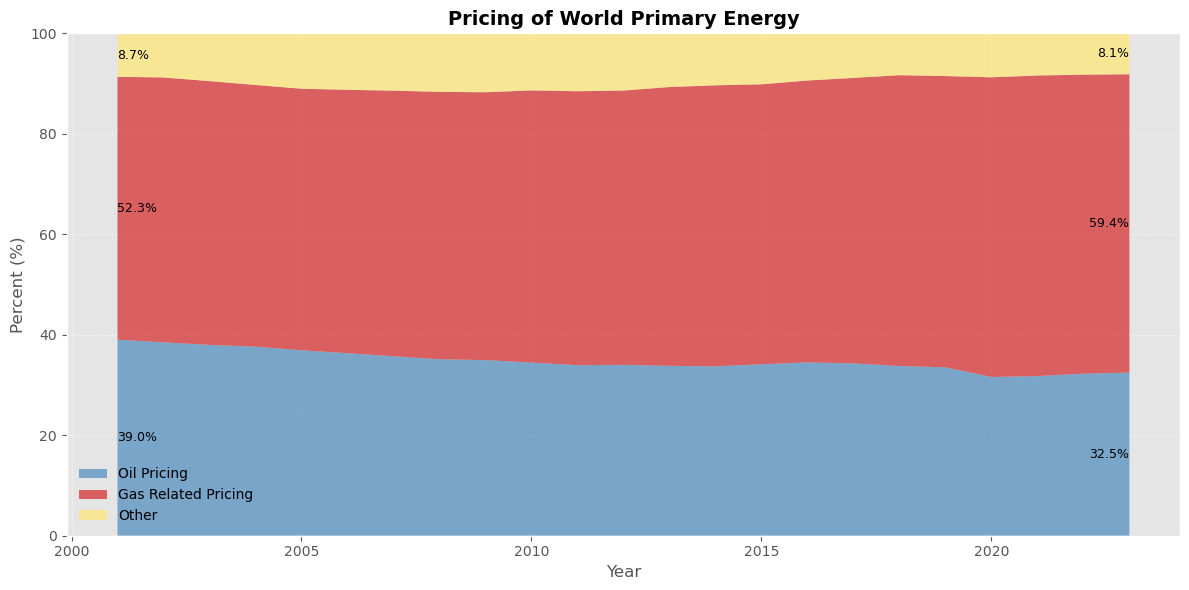

In [37]:
import pandas as pd
import matplotlib.pyplot as plt


stack_data=stack_data[stack_data.index> 2000]


# Normalize rows to get percentages
stack_data_pct = stack_data.div(stack_data.sum(axis=1), axis=0) * 100

#stack_data_pct = stack_data_pct.sort_index().dropna()

# Adjust color palette: economist red for Gas
colors = ['#4B8BBE', '#D62728', '#FFE873']  # Petrol (blue), Gas (red), Diğer (yellow)

# Indices for annotation (first and last year)
first_idx = stack_data_pct.index[0]
last_idx = stack_data_pct.index[-1]


# Get % values for the first and last year
first_vals = stack_data_pct.loc[first_idx]
last_vals = stack_data_pct.loc[last_idx]

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.stackplot(stack_data.index,
             stack_data_pct.T,
             labels=['Oil Pricing', 'Gas Related Pricing', 'Other'],
             colors=colors,
             alpha=0.7)

# Add annotations for first and last year
for i, label in enumerate(['Petrol', 'Gas', 'Diğer']):
    ax.text(first_idx, first_vals.cumsum()[i] - first_vals[i]/2, 
            f"{first_vals[i]:.1f}%", fontsize=9, ha='left', va='center')
    ax.text(last_idx, last_vals.cumsum()[i] - last_vals[i]/2, 
            f"{last_vals[i]:.1f}%", fontsize=9, ha='right', va='center')

# Styling
ax.set_title('Pricing of World Primary Energy', fontsize=14, fontweight='semibold')
ax.set_ylabel('Percent (%)')
ax.set_xlabel('Year')
ax.set_ylim(0, 100)
ax.legend(loc='lower left', frameon=False)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

plt.tight_layout()
plt.show()


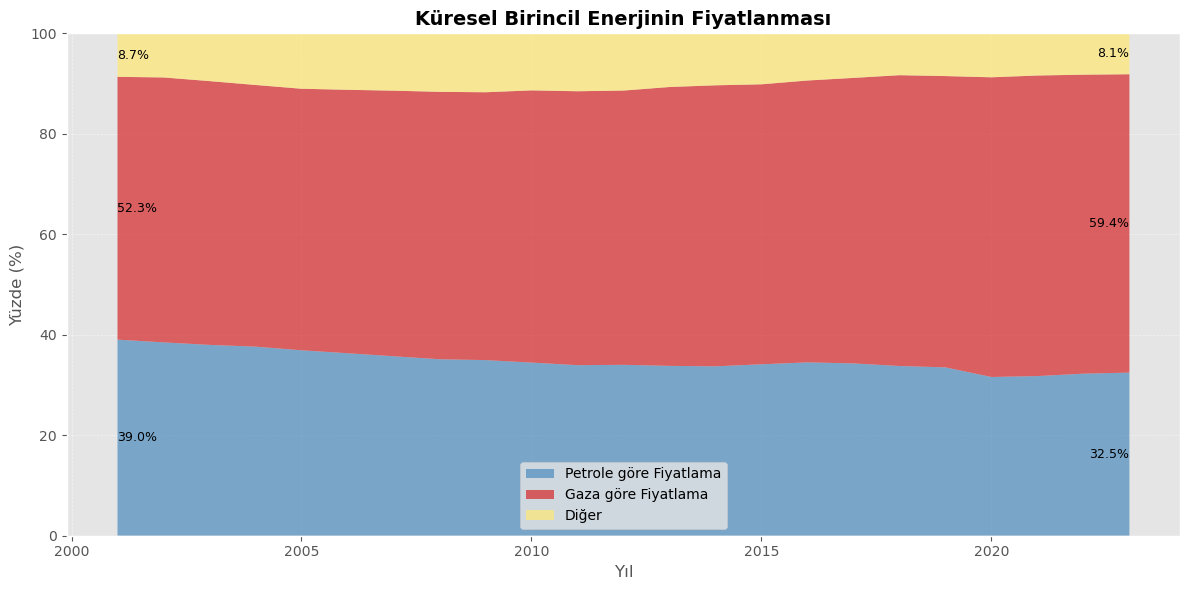

In [40]:
# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.stackplot(stack_data.index,
             stack_data_pct.T,
             labels=['Petrole göre Fiyatlama', 'Gaza göre Fiyatlama', 'Diğer'],
             colors=colors,
             alpha=0.7)

# Add annotations for first and last year
for i, label in enumerate(['Petrol', 'Gas', 'Diğer']):
    ax.text(first_idx, first_vals.cumsum()[i] - first_vals[i]/2, 
            f"{first_vals[i]:.1f}%", fontsize=9, ha='left', va='center')
    ax.text(last_idx, last_vals.cumsum()[i] - last_vals[i]/2, 
            f"{last_vals[i]:.1f}%", fontsize=9, ha='right', va='center')

# Styling
ax.set_title('Küresel Birincil Enerjinin Fiyatlanması', fontsize=14, fontweight='semibold')
ax.set_ylabel('Yüzde (%)')
ax.set_xlabel('Yıl')
ax.set_ylim(0, 100)
ax.legend( frameon=True)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

plt.tight_layout()
plt.show()